## EDA for Smart Cities

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import figure_factory as figfac
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Dell/Downloads/Smart_City_index_headers.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory ("/your/local/directory/path") that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data = pd.read_csv("C:/Users/Dell/Downloads/Smart_City_index_headers.csv")
# Delete Useless columns
data = data.drop(['Id', 'SmartCity_Index_relative_Edmonton'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               102 non-null    object
 1   Country            102 non-null    object
 2   Smart_Mobility     102 non-null    int64 
 3   Smart_Environment  102 non-null    int64 
 4   Smart_Government   102 non-null    int64 
 5   Smart_Economy      102 non-null    int64 
 6   Smart_People       102 non-null    int64 
 7   Smart_Living       102 non-null    int64 
 8   SmartCity_Index    102 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.3+ KB


In [2]:
data

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...,...,...
97,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712
98,Beijing,China,7610,2998,2806,4905,5183,1980,4449
99,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191
100,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678


# Smart cities

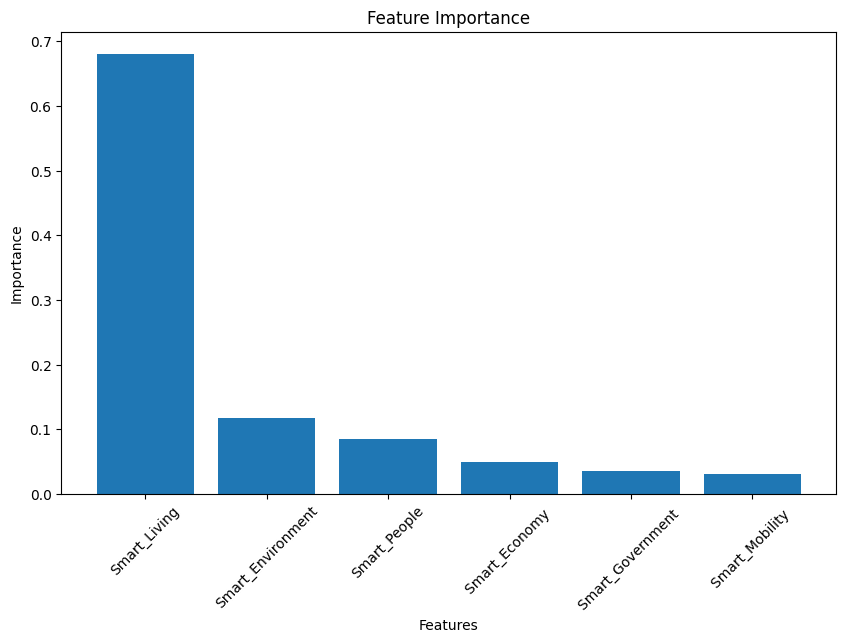

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Separate features and target variable
X = data.drop(['City', 'Country', 'SmartCity_Index'], axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [4]:
data

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...,...,...
97,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712
98,Beijing,China,7610,2998,2806,4905,5183,1980,4449
99,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191
100,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678


In [5]:
print(f'Number of features in X_train: {len(X_train.columns)}')
print(f'Length of feature_importances: {len(feature_importances)}')

Number of features in X_train: 6
Length of feature_importances: 6


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [11]:
data.head()

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812


In [12]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 
data['City']= label_encoder.fit_transform(data['City'])
data['Country']= label_encoder.fit_transform(data['Country'])
print(data.head())

   City  Country  Smart_Mobility   Smart_Environment  Smart_Government    
0    65       22             6480               6512               7516  \
1    11       22             7097               6876               7350   
2     4       20             7540               5558               8528   
3    24        6             7490               7920               8726   
4    82       30             6122               7692               8354   

   Smart_Economy   Smart_People  Smart_Living  SmartCity_Index  
0            4565          8618          9090             7138  
1            4905          8050          9090             7296  
2            8095          7098          7280             7311  
3            5580          5780          7200             7171  
4            4330          6743          7730             6812  


In [14]:
data

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,65,22,6480,6512,7516,4565,8618,9090,7138
1,11,22,7097,6876,7350,4905,8050,9090,7296
2,4,20,7540,5558,8528,8095,7098,7280,7311
3,24,6,7490,7920,8726,5580,5780,7200,7171
4,82,30,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...,...,...
97,74,17,4152,4584,4616,7380,3745,4330,4712
98,10,4,7610,2998,2806,4905,5183,1980,4449
99,80,24,4588,2908,3622,4515,5390,4100,4191
100,20,3,6675,4052,5946,8022,6424,8657,6678


In [15]:
#Split the dataset in features and target variable
feature_cols = ['Smart_Mobility ', 'Smart_Environment', 'Smart_Government ','Smart_Economy ','Smart_People','Smart_Living']
X = data[feature_cols]
y = data['SmartCity_Index']
y = to_categorical(y) # Convertir la variable cible en une matrice one-hot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

     Smart_Mobility   Smart_Environment  Smart_Government   Smart_Economy    
0               6480               6512               7516            4565  \
1               7097               6876               7350            4905   
2               7540               5558               8528            8095   
3               7490               7920               8726            5580   
4               6122               7692               8354            4330   
..               ...                ...                ...             ...   
97              4152               4584               4616            7380   
98              7610               2998               2806            4905   
99              4588               2908               3622            4515   
100             6675               4052               5946            8022   
101             5801               4499               6396            8022   

     Smart_People  Smart_Living  
0            8618          90

In [16]:
X.head()

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living
0,6480,6512,7516,4565,8618,9090
1,7097,6876,7350,4905,8050,9090
2,7540,5558,8528,8095,7098,7280
3,7490,7920,8726,5580,5780,7200
4,6122,7692,8354,4330,6743,7730


In [17]:
import tensorflow as tf

# Set the TensorFlow logging verbosity to ERROR
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [18]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
3/3 [==============================] - 1s 107ms/step - loss: 1.0917e-04 - mae: 1.3091e-04 - val_loss: 2.3923e-04 - val_mae: 2.7196e-04
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 9.6602e-05 - mae: 1.1367e-04 - val_loss: 2.3735e-04 - val_mae: 2.7196e-04
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0684e-04 - mae: 1.2760e-04 - val_loss: 2.4205e-04 - val_mae: 2.7196e-04
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0532e-04 - mae: 1.2173e-04 - val_loss: 2.4986e-04 - val_mae: 2.7196e-04
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 8.8259e-05 - mae: 1.0234e-04 - val_loss: 2.4545e-04 - val_mae: 2.7196e-04
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 8.6385e-05 - mae: 1.0409e-04 - val_loss: 2.5090e-04 - val_mae: 2.7196e-04
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 7.9624e-05 - mae: 1.0711e-04 - val_loss: 2.3495e-04

Now, when you print the evaluation metric, it will be the Mean Absolute Error (MAE) instead of accuracy, and you can interpret it as the average absolute difference between the predicted and true values. Adjust the evaluation metric based on your specific preference.

In [29]:
# Evaluate the model
_, mean_absolute_error = model.evaluate(X_test, y_test)
print("\n----------------------------------------")
print('Mean Absolute Error:', mean_absolute_error)

1/1 [==============================] - 0s 40ms/step - loss: 2.4132e-04 - mae: 2.7195e-04

----------------------------------------
Mean Absolute Error: 0.0002719543408602476


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])

# Separate features (X) and target variable (y)
X = data.drop(['SmartCity_Index'], axis=1)
y = data['SmartCity_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 0.06030649533736029
Mean Absolute Error: 0.19749616946462215


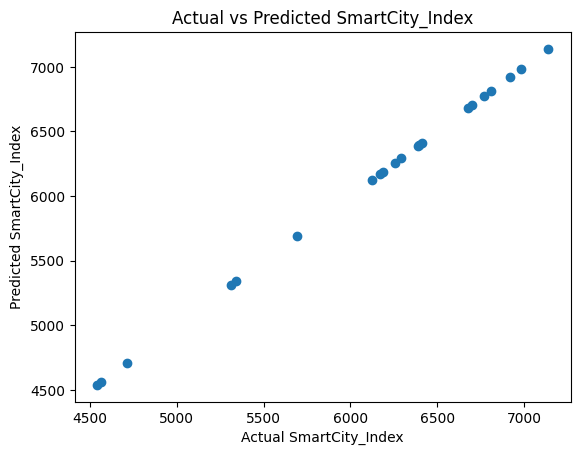

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SmartCity_Index')
plt.ylabel('Predicted SmartCity_Index')
plt.title('Actual vs Predicted SmartCity_Index')
plt.show()


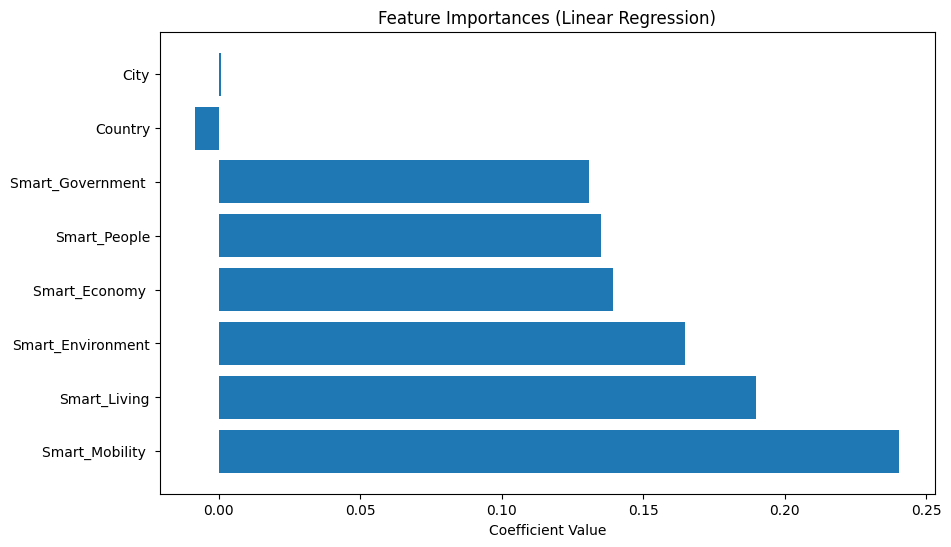

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting feature names
feature_names = X.columns

# Extracting coefficients from the linear regression model
coefficients = model.coef_

# Sorting coefficients and feature names for better visualization
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align="center")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Coefficient Value")
plt.title("Feature Importances (Linear Regression)")
plt.show()


In [45]:
# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])

# Separate features (X) and target variable (y)
X = data

# Print the number of features in your dataset
print("Number of features in the dataset:", X)


Number of features in the dataset:      City  Country  Smart_Mobility   Smart_Environment  Smart_Government    
0      65       22             6480               6512               7516  \
1      11       22             7097               6876               7350   
2       4       20             7540               5558               8528   
3      24        6             7490               7920               8726   
4      82       30             6122               7692               8354   
..    ...      ...              ...                ...                ...   
97     74       17             4152               4584               4616   
98     10        4             7610               2998               2806   
99     80       24             4588               2908               3622   
100    20        3             6675               4052               5946   
101    29        3             5801               4499               6396   

     Smart_Economy   Smart_People  Smart

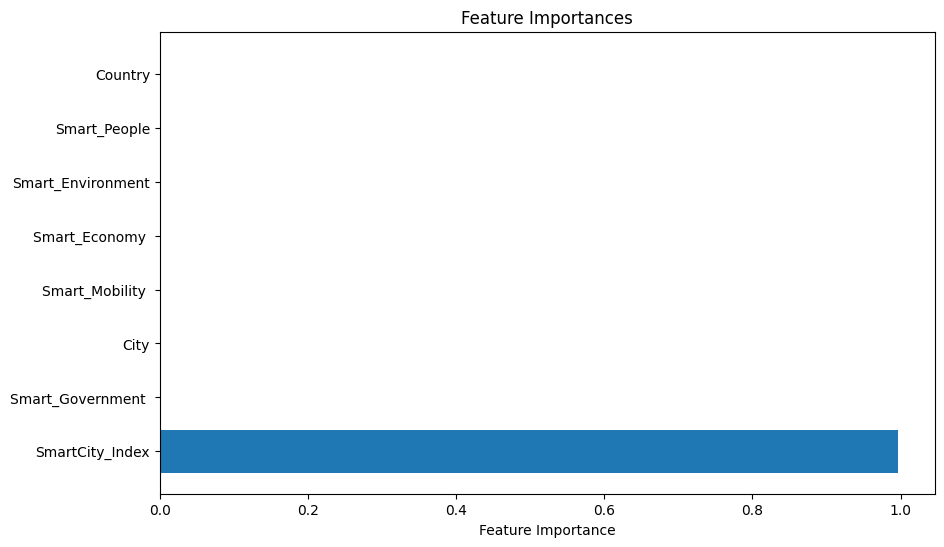

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])

# Encode the target variable if it's categorical
y = data['SmartCity_Index']
if y.dtype == 'O':
    y = label_encoder.fit_transform(y)

# Create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the entire dataset
rf_model.fit(data.drop(['Smart_Living'], axis=1), y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Extract feature names
feature_names = data.drop(['Smart_Living'], axis=1).columns

# Sorting feature importances and feature names for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, align="center")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importances")
plt.show()


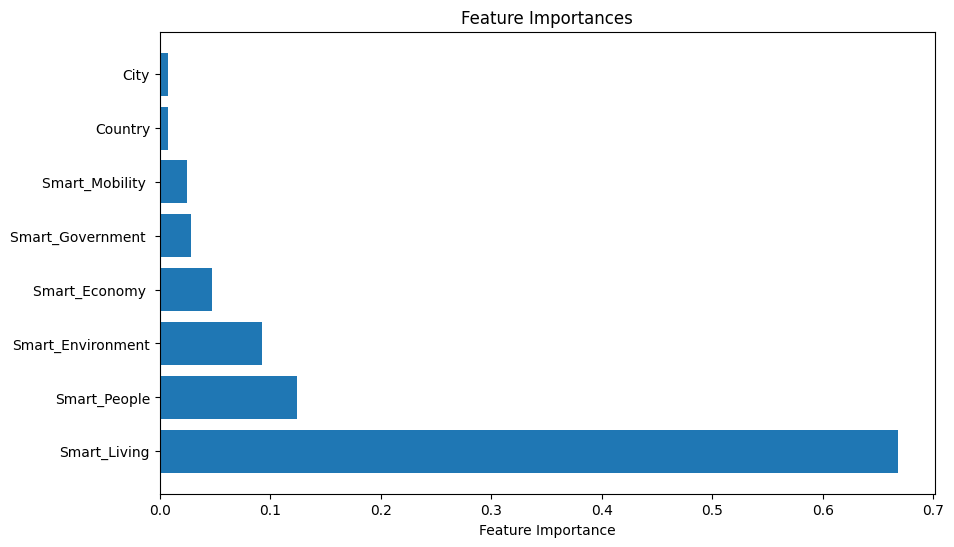

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])

# Encode the target variable if it's categorical
y = data['SmartCity_Index']
if y.dtype == 'O':
    y = label_encoder.fit_transform(y)

# Create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the entire dataset
rf_model.fit(data.drop(['SmartCity_Index'], axis=1), y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Extract feature names
feature_names = data.drop(['SmartCity_Index'], axis=1).columns

# Sorting feature importances and feature names for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, align="center")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importances")
plt.show()


By Saad Farah